# SJSU CMPE 180A Data Structures and Algorithms in Python

**Term Project** (20 points)

** Project Name:  your_dataset_name Analytics**

Team Name:  Jet Setters (example)

Group Number: 8

Group members with SJSU IDs:


1.   Bradley Yong, 008383440
2.   Jonathan Spikes, SJSU_ID 2
3.   Lisa Leib, 018264155


Date:  August 29, 2024

Selected data set:  [US Airline Flight Routes and Fares](https://www.kaggle.com/code/nitikagupta29/us-airline-flight-routes-and-fares)

## Dataset analysis and visualisation

The goal of dataset analysis is to explain what dataset represents and to illustrate the most interesting and relevant features i.e. columns present in dataset.

Possible steps:
1. Load dataset
2. Inspect data and preprocess columns if needed
3. Visualize data (histogram, scatterplot,...)
4. Analyze dataset by plotting or presenting overview of different classes/groups/features
5. Present your results: prepare slides and an  5 to 10-minute presentation in Week 11 of the course


In [20]:
import pandas as pd

flights_df = pd.read_csv('US_Airline_Flight_Routes_and_Fares_1993-2024.csv', low_memory=False)


In [21]:
flight_counts = flights_df.groupby(['airport_1', 'airport_2']).size().reset_index(name='counts')


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 600))
plt.barh(flight_counts.apply(lambda x: f"{x['airport_1']} - {x['airport_2']}", axis=1), flight_counts['counts'])
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')
plt.title('Top Flight Routes by Number of Flights')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


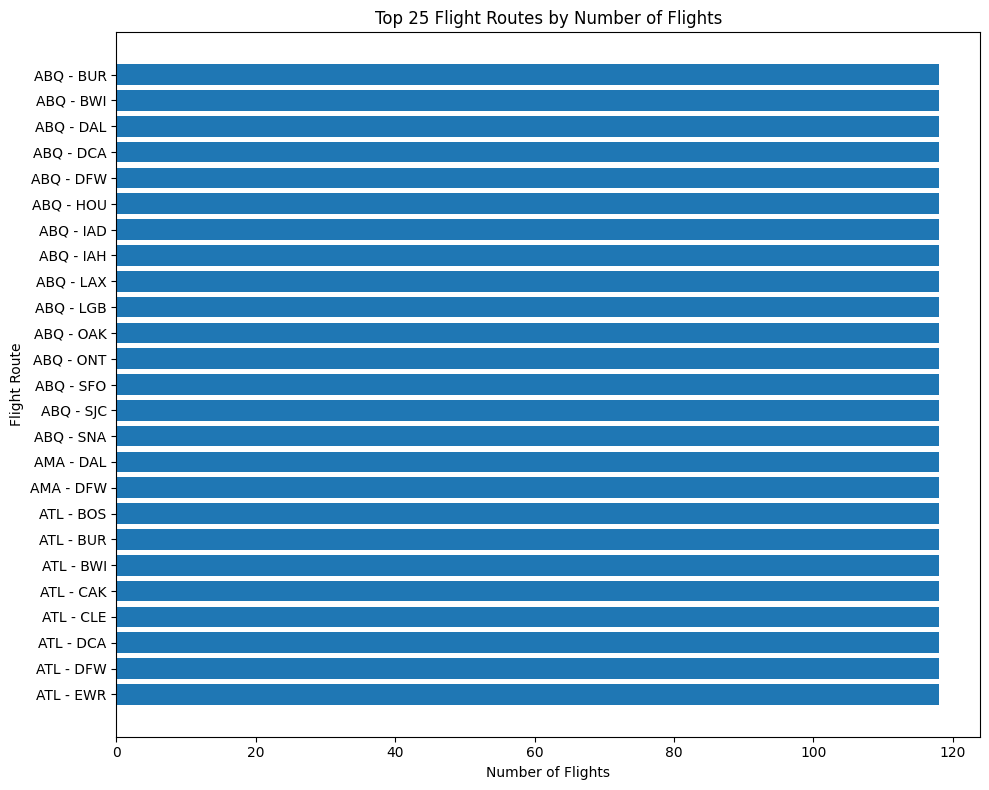

In [23]:
import matplotlib.pyplot as plt
top_25_flights = flight_counts.nlargest(25, 'counts')
plt.figure(figsize=(10, 8))
plt.barh(top_25_flights.apply(lambda x: f"{x['airport_1']} - {x['airport_2']}", axis=1), top_25_flights['counts'])
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')
plt.title('Top 25 Flight Routes by Number of Flights')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


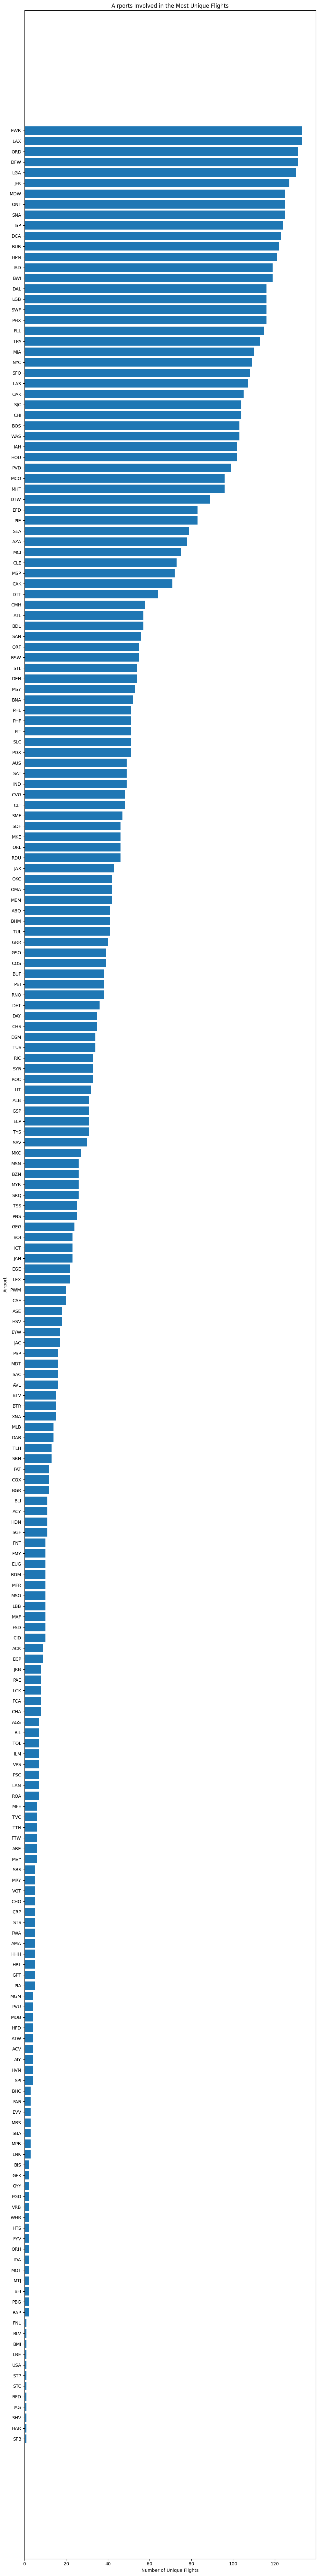

In [24]:
# Count the number of unique flights per airport
airport_counts = pd.concat([flight_counts['airport_1'], flight_counts['airport_2']]).value_counts().reset_index(name='count')
airport_counts.columns = ['airport', 'count']

# Generate a histogram for the airports involved in the most unique flights
plt.figure(figsize=(10, 80))
plt.barh(airport_counts['airport'], airport_counts['count'])
plt.xlabel('Number of Unique Flights')
plt.ylabel('Airport')
plt.title('Airports Involved in the Most Unique Flights')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [25]:
import geopandas as gpd

# Load the dataset from the local file
sdoh_data = gpd.read_file("ne_110m_admin_0_countries.shp")
# Filter for the USA
usa = sdoh_data[sdoh_data['country'] == 'USA']

# Create flight lines (assuming you have a DataFrame 'top_25_flights' with flight data)
flight_lines = top_25_flights.apply(lambda x: LineString([(flights_df[flights_df['iata_code'] == x['airport_1']]['longitude_deg'].values[0], flights_df[flights_df['iata_code'] == x['airport_1']]['latitude_deg'].values[0]), (flights_df[flights_df['iata_code'] == x['airport_2']]['longitude_deg'].values[0], flights_df[flights_df['iata_code'] == x['airport_2']]['latitude_deg'].values[0])]), axis=1)
flight_lines_gdf = gpd.GeoDataFrame(top_25_flights, geometry=flight_lines)

# Plot flights on USA map
fig, ax = plt.subplots(figsize=(15, 10))
usa.plot(ax=ax, color='white', edgecolor='black')
flight_lines_gdf.plot(ax=ax, linewidth=flight_lines_gdf['counts'] / 10, color='blue')
plt.title('Top 25 Most Frequent Flight Routes in the USA')
plt.show()


DriverError: Failed to open dataset (flags=68): ne_110m_admin_0_countries.shp